In [1]:
import pandas as pd
import os
import sys
import importlib
sys.path.append("../scripts/")
import regex_maven
import rq_aux
import matplotlib.pyplot as plt
importlib.reload(regex_maven)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [2]:
regex = regex_maven
analysis_output = "figures"
os.makedirs(analysis_output, exist_ok=True)

plugins = regex.plugins
categories = regex.categories
categories_short = regex.categories_short
build_tool = "maven"
noerror = False
output_path = "../data/output_data/"
overview_dataset = f"{output_path}overview_daylight_witherror.csv"
alltasks_dataset = f"{output_path}all_tasks_witherror.csv"
analysis_output = "figures"
os.makedirs(analysis_output, exist_ok=True)

In [3]:
rq_aux.check_categories(regex)

In [4]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Build tool maven = 135944


In [5]:
tasks_energy_category = {}
tasks_energy_category['all'] = rq_aux.field_by_cat(df, 'energy', plugins, categories)

for x in sizes1:
    tasks_energy_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'energy', plugins, categories)

In [6]:
tasks_time_category = {}
tasks_time_category['all'] = rq_aux.field_by_cat(df, 'seconds', plugins, categories)

for x in sizes1:
    tasks_time_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'seconds', plugins, categories)

In [7]:
tasks_power_category = {}
tasks_power_category['all'] = rq_aux.power_by_cat(df, plugins, categories)

for x in sizes1:
    tasks_power_category[x] = rq_aux.power_by_cat(df[df["size"] == x], plugins, categories)

In [8]:
total_energy = 0
total_power = 0
for x in sizes1:
  for key, value in tasks_energy_category[x].items():
    total_energy += len(value)
    
  for key, value in tasks_power_category[x].items():
    total_power += len(value)

assert total_energy == len(df)
assert total_power == len(df)

In [9]:
total_energy = 0
total_power = 0
for key, value in tasks_energy_category['all'].items():
    print(key, len(value))
    total_energy += len(value)
    
for key, value in tasks_power_category['all'].items():
    print(key, len(value))
    total_power += len(value)


assert total_energy == len(df)
assert total_power == len(df)

Integration Test 589
Unit Test 8403
Compile 37027
Documentation 4596
Install 6472
Linter 18083
Packaging 22892
Others 31488
Unclassified 6394
Integration Test 589
Unit Test 8403
Compile 37027
Documentation 4596
Install 6472
Linter 18083
Packaging 22892
Others 31488
Unclassified 6394


In [10]:
rq_aux.calc_category_kruskall_mwu(tasks_time_category['all'])

Category: Integration Test, N: 589, median: 346916.000
Category: Unit Test, N: 8403, median: 2241823.000
Category: Compile, N: 37027, median: 552804.000
Category: Documentation, N: 4596, median: 1249075.500
Category: Install, N: 6472, median: 149335.500
Category: Linter, N: 18083, median: 280164.000
Category: Packaging, N: 22892, median: 125689.500
Category: Others, N: 31488, median: 114572.500
Category: Unclassified, N: 6394, median: 223106.000

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(22609.557305922797), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (-0.313)
Integration Test x Compile: EQUAL
Integration Test x Documentation: Cliff small (-0.192)
Integration Test x Install: Cliff small (0.202)
Integration Test x Linter: Cliff negligible (0.110)
Integration Test x

Compile x Compile: EQUAL
Compile x Documentation: Cliff small (-0.247)
Compile x Install: Cliff medium (0.362)
Compile x Linter: Cliff small (0.212)
Compile x Packaging: Cliff large (0.476)
Compile x Others: Cliff medium (0.451)
Compile x Unclassified: Cliff small (0.240)

Documentation x Integration Test: Cliff small (0.192)
Documentation x Unit Test: Cliff small (-0.232)
Documentation x Compile: Cliff small (0.247)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff large (0.506)
Documentation x Linter: Cliff medium (0.421)
Documentation x Packaging: Cliff large (0.616)


Documentation x Others: Cliff large (0.578)
Documentation x Unclassified: Cliff medium (0.425)

Install x Integration Test: Cliff small (-0.202)
Install x Unit Test: Cliff large (-0.580)
Install x Compile: Cliff medium (-0.362)
Install x Documentation: Cliff large (-0.506)
Install x Install: EQUAL
Install x Linter: Cliff small (-0.166)
Install x Packaging: Cliff negligible (0.082)
Install x Others: Cliff negligible (0.073)
Install x Unclassified: Cliff negligible (-0.123)

Linter x Integration Test: Cliff negligible (-0.110)
Linter x Unit Test: Cliff large (-0.522)
Linter x Compile: Cliff small (-0.212)
Linter x Documentation: Cliff medium (-0.421)
Linter x Install: Cliff small (0.166)
Linter x Linter: EQUAL
Linter x Packaging: Cliff small (0.268)
Linter x Others: Cliff small (0.247)


Linter x Unclassified: Cliff negligible (0.038)

Packaging x Integration Test: Cliff small (-0.278)
Packaging x Unit Test: Cliff large (-0.659)
Packaging x Compile: Cliff large (-0.476)
Packaging x Documentation: Cliff large (-0.616)
Packaging x Install: Cliff negligible (-0.082)
Packaging x Linter: Cliff small (-0.268)
Packaging x Packaging: EQUAL
Packaging x Others: EQUAL
Packaging x Unclassified: Cliff small (-0.217)

Others x Integration Test: Cliff small (-0.270)
Others x Unit Test: Cliff large (-0.633)
Others x Compile: Cliff medium (-0.451)


Others x Documentation: Cliff large (-0.578)
Others x Install: Cliff negligible (-0.073)
Others x Linter: Cliff small (-0.247)
Others x Packaging: EQUAL
Others x Others: EQUAL
Others x Unclassified: Cliff small (-0.205)

Unclassified x Integration Test: Cliff negligible (-0.127)
Unclassified x Unit Test: Cliff large (-0.519)
Unclassified x Compile: Cliff small (-0.240)
Unclassified x Documentation: Cliff medium (-0.425)
Unclassified x Install: Cliff negligible (0.123)
Unclassified x Linter: Cliff negligible (-0.038)
Unclassified x Packaging: Cliff small (0.217)
Unclassified x Others: Cliff small (0.205)
Unclassified x Unclassified: EQUAL



In [11]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['all'])

Category: Integration Test, N: 589, median: 15.669
Category: Unit Test, N: 8403, median: 59.637
Category: Compile, N: 37027, median: 16.582
Category: Documentation, N: 4596, median: 32.661
Category: Install, N: 6472, median: 6.479
Category: Linter, N: 18083, median: 12.311
Category: Packaging, N: 22892, median: 5.572
Category: Others, N: 31488, median: 4.284
Category: Unclassified, N: 6394, median: 11.608

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(21122.939910185447), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff medium (-0.342)
Integration Test x Compile: EQUAL
Integration Test x Documentation: Cliff small (-0.239)
Integration Test x Install: Cliff small (0.266)


Integration Test x Linter: Cliff negligible (0.141)
Integration Test x Packaging: Cliff small (0.318)
Integration Test x Others: Cliff small (0.310)
Integration Test x Unclassified: Cliff negligible (0.146)

Unit Test x Integration Test: Cliff medium (0.342)
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff medium (0.396)
Unit Test x Documentation: Cliff small (0.224)
Unit Test x Install: Cliff large (0.627)
Unit Test x Linter: Cliff large (0.544)
Unit Test x Packaging: Cliff large (0.673)
Unit Test x Others: Cliff large (0.654)
Unit Test x Unclassified: Cliff large (0.537)

Compile x Integration Test: EQUAL
Compile x Unit Test: Cliff medium (-0.396)
Compile x Compile: EQUAL
Compile x Documentation: Cliff small (-0.246)
Compile x Install: Cliff medium (0.364)
Compile x Linter: Cliff small (0.218)


Compile x Packaging: Cliff medium (0.425)


Compile x Others: Cliff medium (0.410)
Compile x Unclassified: Cliff small (0.221)

Documentation x Integration Test: Cliff small (0.239)
Documentation x Unit Test: Cliff small (-0.224)
Documentation x Compile: Cliff small (0.246)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff large (0.567)
Documentation x Linter: Cliff medium (0.455)
Documentation x Packaging: Cliff large (0.628)
Documentation x Others: Cliff large (0.601)
Documentation x Unclassified: Cliff medium (0.444)

Install x Integration Test: Cliff small (-0.266)
Install x Unit Test: Cliff large (-0.627)
Install x Compile: Cliff medium (-0.364)
Install x Documentation: Cliff large (-0.567)
Install x Install: EQUAL
Install x Linter: Cliff small (-0.159)
Install x Packaging: Cliff negligible (0.055)
Install x Others: Cliff negligible (0.057)
Install x Unclassified: Cliff negligible (-0.144)

Linter x Integration Test: Cliff negligible (-0.141)
Linter x Unit Test: Cliff large (-0.544)
Linter x Compile: Cliff

Linter x Linter: EQUAL
Linter x Packaging: Cliff small (0.220)


Linter x Others: Cliff small (0.213)
Linter x Unclassified: EQUAL

Packaging x Integration Test: Cliff small (-0.318)
Packaging x Unit Test: Cliff large (-0.673)
Packaging x Compile: Cliff medium (-0.425)
Packaging x Documentation: Cliff large (-0.628)
Packaging x Install: Cliff negligible (-0.055)
Packaging x Linter: Cliff small (-0.220)
Packaging x Packaging: EQUAL
Packaging x Others: EQUAL
Packaging x Unclassified: Cliff small (-0.202)

Others x Integration Test: Cliff small (-0.310)
Others x Unit Test: Cliff large (-0.654)
Others x Compile: Cliff medium (-0.410)
Others x Documentation: Cliff large (-0.601)


Others x Install: Cliff negligible (-0.057)
Others x Linter: Cliff small (-0.213)


Others x Packaging: EQUAL
Others x Others: EQUAL
Others x Unclassified: Cliff small (-0.196)

Unclassified x Integration Test: Cliff negligible (-0.146)
Unclassified x Unit Test: Cliff large (-0.537)
Unclassified x Compile: Cliff small (-0.221)
Unclassified x Documentation: Cliff medium (-0.444)
Unclassified x Install: Cliff negligible (0.144)
Unclassified x Linter: EQUAL
Unclassified x Packaging: Cliff small (0.202)
Unclassified x Others: Cliff small (0.196)
Unclassified x Unclassified: EQUAL



In [12]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['all'])

Category: Integration Test, N: 589, median: 0.031
Category: Unit Test, N: 8403, median: 0.028
Category: Compile, N: 37027, median: 0.031
Category: Documentation, N: 4596, median: 0.031
Category: Install, N: 6472, median: 0.035
Category: Linter, N: 18083, median: 0.032
Category: Packaging, N: 22892, median: 0.040
Category: Others, N: 31488, median: 0.039
Category: Unclassified, N: 6394, median: 0.034

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(4969.646447831835), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff negligible (0.109)
Integration Test x Compile: EQUAL
Integration Test x Documentation: EQUAL
Integration Test x Install: Cliff negligible (-0.060)
Integration Test x Linter: EQUAL
Integration Test x Packaging: Cliff small (-0.157)
Integration Test x Others: Cliff neglig

Unit Test x Linter: Cliff small (-0.193)
Unit Test x Packaging: Cliff medium (-0.346)


Unit Test x Others: Cliff small (-0.325)
Unit Test x Unclassified: Cliff small (-0.230)

Compile x Integration Test: EQUAL
Compile x Unit Test: Cliff small (0.191)
Compile x Compile: EQUAL
Compile x Documentation: Cliff negligible (0.071)


Compile x Install: Cliff negligible (-0.103)
Compile x Linter: Cliff negligible (-0.038)
Compile x Packaging: Cliff small (-0.234)
Compile x Others: Cliff small (-0.208)
Compile x Unclassified: Cliff negligible (-0.094)

Documentation x Integration Test: EQUAL
Documentation x Unit Test: Cliff negligible (0.120)


Documentation x Compile: Cliff negligible (-0.071)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff negligible (-0.142)
Documentation x Linter: Cliff negligible (-0.095)


Documentation x Packaging: Cliff small (-0.272)
Documentation x Others: Cliff small (-0.249)
Documentation x Unclassified: Cliff negligible (-0.145)

Install x Integration Test: Cliff negligible (0.060)
Install x Unit Test: Cliff small (0.215)
Install x Compile: Cliff negligible (0.103)
Install x Documentation: Cliff negligible (0.142)
Install x Install: EQUAL
Install x Linter: Cliff negligible (0.051)
Install x Packaging: Cliff negligible (-0.088)


Install x Others: Cliff negligible (-0.076)
Install x Unclassified: Cliff negligible (0.022)

Linter x Integration Test: EQUAL
Linter x Unit Test: Cliff small (0.193)
Linter x Compile: Cliff negligible (0.038)
Linter x Documentation: Cliff negligible (0.095)
Linter x Install: Cliff negligible (-0.051)
Linter x Linter: EQUAL
Linter x Packaging: Cliff small (-0.164)
Linter x Others: Cliff negligible (-0.144)


Linter x Unclassified: Cliff negligible (-0.040)

Packaging x Integration Test: Cliff small (0.157)


Packaging x Unit Test: Cliff medium (0.346)
Packaging x Compile: Cliff small (0.234)
Packaging x Documentation: Cliff small (0.272)
Packaging x Install: Cliff negligible (0.088)
Packaging x Linter: Cliff small (0.164)


Packaging x Packaging: EQUAL
Packaging x Others: Cliff negligible (0.014)
Packaging x Unclassified: Cliff negligible (0.120)

Others x Integration Test: Cliff negligible (0.147)
Others x Unit Test: Cliff small (0.325)
Others x Compile: Cliff small (0.208)


Others x Documentation: Cliff small (0.249)
Others x Install: Cliff negligible (0.076)


Others x Linter: Cliff negligible (0.144)
Others x Packaging: Cliff negligible (-0.014)
Others x Others: EQUAL
Others x Unclassified: Cliff negligible (0.104)



Unclassified x Integration Test: Cliff negligible (0.062)
Unclassified x Unit Test: Cliff small (0.230)
Unclassified x Compile: Cliff negligible (0.094)
Unclassified x Documentation: Cliff negligible (0.145)
Unclassified x Install: Cliff negligible (-0.022)
Unclassified x Linter: Cliff negligible (0.040)
Unclassified x Packaging: Cliff negligible (-0.120)
Unclassified x Others: Cliff negligible (-0.104)
Unclassified x Unclassified: EQUAL



In [13]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['small'])

Category: Integration Test, N: 2, median: 212.888
Category: Unit Test, N: 780, median: 71.160
Category: Compile, N: 1894, median: 16.418
Category: Documentation, N: 296, median: 44.719
Category: Install, N: 119, median: 10.180
Category: Linter, N: 672, median: 7.437
Category: Packaging, N: 1139, median: 6.349
Category: Others, N: 2513, median: 3.843
Category: Unclassified, N: 319, median: 17.088

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']

KruskalResult(statistic=np.float64(1468.42297281816), pvalue=np.float64(0.0))
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff large (0.520)
Unit Test x Documentation: Cliff small (0.165)
Unit Test x Install: Cliff large (0.639)
Unit Test x Linter: Cliff large (0.543)
Unit Test x Packaging: Cliff large (0.705)
Unit Test x Others: Cliff large (0.711)
Unit Test x Unclassified: Cliff medium (0.456)

Compile x Unit Test: Cliff 

Linter x Compile: Cliff negligible (-0.135)
Linter x Documentation: Cliff large (-0.508)
Linter x Install: EQUAL
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (0.118)
Linter x Others: Cliff negligible (0.145)
Linter x Unclassified: Cliff small (-0.246)

Packaging x Unit Test: Cliff large (-0.705)
Packaging x Compile: Cliff small (-0.302)
Packaging x Documentation: Cliff large (-0.694)
Packaging x Install: Cliff small (-0.163)
Packaging x Linter: Cliff negligible (-0.118)
Packaging x Packaging: EQUAL
Packaging x Others: EQUAL
Packaging x Unclassified: Cliff medium (-0.439)

Others x Unit Test: Cliff large (-0.711)
Others x Compile: Cliff small (-0.312)
Others x Documentation: Cliff large (-0.687)
Others x Install: Cliff small (-0.198)
Others x Linter: Cliff negligible (-0.145)
Others x Packaging: EQUAL
Others x Others: EQUAL
Others x Unclassified: Cliff medium (-0.443)

Unclassified x Unit Test: Cliff medium (-0.456)
Unclassified x Compile: Cliff negligible (0.110)
Unclass

In [14]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['small'])

Category: Integration Test, N: 2, median: 0.008
Category: Unit Test, N: 780, median: 0.029
Category: Compile, N: 1894, median: 0.034
Category: Documentation, N: 296, median: 0.028
Category: Install, N: 119, median: 0.041
Category: Linter, N: 672, median: 0.039
Category: Packaging, N: 1139, median: 0.043
Category: Others, N: 2513, median: 0.040
Category: Unclassified, N: 319, median: 0.034

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']



KruskalResult(statistic=np.float64(457.78692237719224), pvalue=np.float64(9.44253559001558e-95))
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff small (-0.305)
Unit Test x Documentation: EQUAL
Unit Test x Install: Cliff medium (-0.373)
Unit Test x Linter: Cliff medium (-0.349)
Unit Test x Packaging: Cliff medium (-0.429)
Unit Test x Others: Cliff medium (-0.386)
Unit Test x Unclassified: Cliff small (-0.264)

Compile x Unit Test: Cliff small (0.305)
Compile x Compile: EQUAL
Compile x Documentation: Cliff small (0.306)
Compile x Install: Cliff negligible (-0.122)
Compile x Linter: Cliff negligible (-0.116)
Compile x Packaging: Cliff small (-0.196)
Compile x Others: Cliff negligible (-0.141)
Compile x Unclassified: EQUAL

Documentation x Unit Test: EQUAL
Documentation x Compile: Cliff small (-0.306)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff medium (-0.359)
Documentation x Linter: Cliff medium (-0.333)
Documentation x Packaging: Cliff medium (-0.394)
Docu

Packaging x Others: Cliff negligible (0.049)
Packaging x Unclassified: Cliff small (0.241)

Others x Unit Test: Cliff medium (0.386)
Others x Compile: Cliff negligible (0.141)
Others x Documentation: Cliff medium (0.366)
Others x Install: EQUAL
Others x Linter: EQUAL
Others x Packaging: Cliff negligible (-0.049)
Others x Others: EQUAL
Others x Unclassified: Cliff small (0.187)

Unclassified x Unit Test: Cliff small (0.264)
Unclassified x Compile: EQUAL
Unclassified x Documentation: Cliff small (0.254)
Unclassified x Install: Cliff small (-0.170)
Unclassified x Linter: Cliff small (-0.162)
Unclassified x Packaging: Cliff small (-0.241)
Unclassified x Others: Cliff small (-0.187)
Unclassified x Unclassified: EQUAL



In [15]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['medium'])

Category: Integration Test, N: 267, median: 26.680
Category: Unit Test, N: 3582, median: 47.324
Category: Compile, N: 13652, median: 16.186
Category: Documentation, N: 2436, median: 33.115
Category: Install, N: 2289, median: 6.771
Category: Linter, N: 4463, median: 6.275
Category: Packaging, N: 8004, median: 6.080
Category: Others, N: 12099, median: 3.857
Category: Unclassified, N: 2812, median: 9.773

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(7996.773637509819), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (-0.164)
Integration Test x Compile: Cliff small (0.192)
Integration Test x Documentation: Cliff negligible (-0.099)
Integration Test x Install: Cliff medium (0.402)
Integration Test x Linter: Cliff medium (0.426)
Integration Test x Packaging: Cliff large (0.487

Unit Test x Packaging: Cliff large (0.649)
Unit Test x Others: Cliff large (0.648)
Unit Test x Unclassified: Cliff large (0.523)

Compile x Integration Test: Cliff small (-0.192)
Compile x Unit Test: Cliff medium (-0.384)
Compile x Compile: EQUAL
Compile x Documentation: Cliff medium (-0.344)
Compile x Install: Cliff small (0.261)


Compile x Linter: Cliff small (0.284)
Compile x Packaging: Cliff medium (0.353)
Compile x Others: Cliff medium (0.363)
Compile x Unclassified: Cliff small (0.187)

Documentation x Integration Test: Cliff negligible (0.099)
Documentation x Unit Test: Cliff negligible (-0.135)
Documentation x Compile: Cliff medium (0.344)


Documentation x Documentation: EQUAL
Documentation x Install: Cliff large (0.596)
Documentation x Linter: Cliff large (0.611)
Documentation x Packaging: Cliff large (0.699)
Documentation x Others: Cliff large (0.696)
Documentation x Unclassified: Cliff large (0.534)

Install x Integration Test: Cliff medium (-0.402)
Install x Unit Test: Cliff large (-0.567)
Install x Compile: Cliff small (-0.261)
Install x Documentation: Cliff large (-0.596)
Install x Install: EQUAL
Install x Linter: Cliff negligible (0.030)
Install x Packaging: Cliff negligible (0.083)
Install x Others: Cliff negligible (0.099)
Install x Unclassified: Cliff negligible (-0.082)

Linter x Integration Test: Cliff medium (-0.426)
Linter x Unit Test: Cliff large (-0.585)
Linter x Compile: Cliff small (-0.284)


Linter x Documentation: Cliff large (-0.611)
Linter x Install: Cliff negligible (-0.030)
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (0.052)
Linter x Others: Cliff negligible (0.069)
Linter x Unclassified: Cliff negligible (-0.110)

Packaging x Integration Test: Cliff large (-0.487)


Packaging x Unit Test: Cliff large (-0.649)
Packaging x Compile: Cliff medium (-0.353)
Packaging x Documentation: Cliff large (-0.699)
Packaging x Install: Cliff negligible (-0.083)
Packaging x Linter: Cliff negligible (-0.052)
Packaging x Packaging: EQUAL
Packaging x Others: Cliff negligible (0.019)
Packaging x Unclassified: Cliff small (-0.171)

Others x Integration Test: Cliff large (-0.490)


Others x Unit Test: Cliff large (-0.648)
Others x Compile: Cliff medium (-0.363)
Others x Documentation: Cliff large (-0.696)
Others x Install: Cliff negligible (-0.099)
Others x Linter: Cliff negligible (-0.069)
Others x Packaging: Cliff negligible (-0.019)
Others x Others: EQUAL


Others x Unclassified: Cliff small (-0.185)

Unclassified x Integration Test: Cliff medium (-0.347)
Unclassified x Unit Test: Cliff large (-0.523)
Unclassified x Compile: Cliff small (-0.187)
Unclassified x Documentation: Cliff large (-0.534)
Unclassified x Install: Cliff negligible (0.082)
Unclassified x Linter: Cliff negligible (0.110)
Unclassified x Packaging: Cliff small (0.171)
Unclassified x Others: Cliff small (0.185)
Unclassified x Unclassified: EQUAL



In [16]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['medium'])

Category: Integration Test, N: 267, median: 0.026
Category: Unit Test, N: 3582, median: 0.029
Category: Compile, N: 13652, median: 0.033
Category: Documentation, N: 2436, median: 0.031
Category: Install, N: 2289, median: 0.038
Category: Linter, N: 4463, median: 0.040
Category: Packaging, N: 8004, median: 0.043
Category: Others, N: 12099, median: 0.039
Category: Unclassified, N: 2812, median: 0.036

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(2584.4836673358227), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (-0.211)
Integration Test x Documentation: Cliff negligible (-0.116)
Integration Test x Install: Cliff small (-0.244)
Integration Test x Linter: Cliff small (-0.315)
Integration Test x Packaging: Cliff medium (-0.343)
Integration T

Unit Test x Others: Cliff medium (-0.355)
Unit Test x Unclassified: Cliff small (-0.277)

Compile x Integration Test: Cliff small (0.211)
Compile x Unit Test: Cliff small (0.215)
Compile x Compile: EQUAL


Compile x Documentation: Cliff negligible (0.147)
Compile x Install: Cliff negligible (-0.142)
Compile x Linter: Cliff small (-0.205)
Compile x Packaging: Cliff small (-0.251)
Compile x Others: Cliff small (-0.200)
Compile x Unclassified: Cliff negligible (-0.111)



Documentation x Integration Test: Cliff negligible (0.116)
Documentation x Unit Test: Cliff negligible (0.086)
Documentation x Compile: Cliff negligible (-0.147)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff small (-0.235)
Documentation x Linter: Cliff small (-0.328)
Documentation x Packaging: Cliff medium (-0.362)
Documentation x Others: Cliff small (-0.317)
Documentation x Unclassified: Cliff small (-0.234)

Install x Integration Test: Cliff small (0.244)
Install x Unit Test: Cliff small (0.274)
Install x Compile: Cliff negligible (0.142)
Install x Documentation: Cliff small (0.235)
Install x Install: EQUAL
Install x Linter: EQUAL


Install x Packaging: Cliff negligible (-0.068)
Install x Others: Cliff negligible (-0.030)
Install x Unclassified: Cliff negligible (0.041)

Linter x Integration Test: Cliff small (0.315)
Linter x Unit Test: Cliff medium (0.366)
Linter x Compile: Cliff small (0.205)
Linter x Documentation: Cliff small (0.328)
Linter x Install: EQUAL
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (-0.054)


Linter x Others: EQUAL
Linter x Unclassified: Cliff negligible (0.078)

Packaging x Integration Test: Cliff medium (0.343)
Packaging x Unit Test: Cliff medium (0.393)
Packaging x Compile: Cliff small (0.251)
Packaging x Documentation: Cliff medium (0.362)
Packaging x Install: Cliff negligible (0.068)
Packaging x Linter: Cliff negligible (0.054)
Packaging x Packaging: EQUAL
Packaging x Others: Cliff negligible (0.045)
Packaging x Unclassified: Cliff negligible (0.124)



Others x Integration Test: Cliff small (0.313)
Others x Unit Test: Cliff medium (0.355)
Others x Compile: Cliff small (0.200)


Others x Documentation: Cliff small (0.317)
Others x Install: Cliff negligible (0.030)
Others x Linter: EQUAL
Others x Packaging: Cliff negligible (-0.045)
Others x Others: EQUAL
Others x Unclassified: Cliff negligible (0.080)

Unclassified x Integration Test: Cliff small (0.248)
Unclassified x Unit Test: Cliff small (0.277)
Unclassified x Compile: Cliff negligible (0.111)
Unclassified x Documentation: Cliff small (0.234)


Unclassified x Install: Cliff negligible (-0.041)
Unclassified x Linter: Cliff negligible (-0.078)
Unclassified x Packaging: Cliff negligible (-0.124)
Unclassified x Others: Cliff negligible (-0.080)
Unclassified x Unclassified: EQUAL



In [17]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['large'])

Category: Integration Test, N: 320, median: 10.228
Category: Unit Test, N: 4041, median: 67.636
Category: Compile, N: 21481, median: 16.976
Category: Documentation, N: 1864, median: 30.595
Category: Install, N: 4064, median: 6.145
Category: Linter, N: 12948, median: 13.008
Category: Packaging, N: 13749, median: 5.280
Category: Others, N: 16876, median: 4.627
Category: Unclassified, N: 3263, median: 11.552

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(12390.983512413868), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff medium (-0.472)
Integration Test x Compile: Cliff small (-0.247)
Integration Test x Documentation: Cliff small (-0.302)
Integration Test x Install: Cliff negligible (0.144)
Integration Test x Linter: Cliff negligible (-0.072)


Integration Test x Packaging: Cliff small (0.186)
Integration Test x Others: Cliff small (0.183)
Integration Test x Unclassified: EQUAL

Unit Test x Integration Test: Cliff medium (0.472)
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff medium (0.400)
Unit Test x Documentation: Cliff small (0.317)
Unit Test x Install: Cliff large (0.653)
Unit Test x Linter: Cliff large (0.543)


Unit Test x Packaging: Cliff large (0.682)
Unit Test x Others: Cliff large (0.652)
Unit Test x Unclassified: Cliff large (0.551)

Compile x Integration Test: Cliff small (0.247)
Compile x Unit Test: Cliff medium (-0.400)
Compile x Compile: EQUAL
Compile x Documentation: Cliff negligible (-0.118)
Compile x Install: Cliff medium (0.432)


Compile x Linter: Cliff small (0.225)
Compile x Packaging: Cliff large (0.474)


Compile x Others: Cliff medium (0.444)
Compile x Unclassified: Cliff small (0.268)

Documentation x Integration Test: Cliff small (0.302)
Documentation x Unit Test: Cliff small (-0.317)
Documentation x Compile: Cliff negligible (0.118)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff large (0.488)
Documentation x Linter: Cliff small (0.324)


Documentation x Packaging: Cliff large (0.528)
Documentation x Others: Cliff large (0.493)
Documentation x Unclassified: Cliff medium (0.343)

Install x Integration Test: Cliff negligible (-0.144)


Install x Unit Test: Cliff large (-0.653)
Install x Compile: Cliff medium (-0.432)
Install x Documentation: Cliff large (-0.488)
Install x Install: EQUAL
Install x Linter: Cliff small (-0.237)
Install x Packaging: Cliff negligible (0.045)
Install x Others: Cliff negligible (0.045)


Install x Unclassified: Cliff small (-0.150)

Linter x Integration Test: Cliff negligible (0.072)
Linter x Unit Test: Cliff large (-0.543)
Linter x Compile: Cliff small (-0.225)
Linter x Documentation: Cliff small (-0.324)


Linter x Install: Cliff small (0.237)
Linter x Linter: EQUAL
Linter x Packaging: Cliff small (0.283)
Linter x Others: Cliff small (0.264)
Linter x Unclassified: Cliff negligible (0.072)

Packaging x Integration Test: Cliff small (-0.186)
Packaging x Unit Test: Cliff large (-0.682)
Packaging x Compile: Cliff large (-0.474)
Packaging x Documentation: Cliff large (-0.528)


Packaging x Install: Cliff negligible (-0.045)
Packaging x Linter: Cliff small (-0.283)
Packaging x Packaging: EQUAL
Packaging x Others: EQUAL
Packaging x Unclassified: Cliff small (-0.193)



Others x Integration Test: Cliff small (-0.183)
Others x Unit Test: Cliff large (-0.652)
Others x Compile: Cliff medium (-0.444)


Others x Documentation: Cliff large (-0.493)


Others x Install: Cliff negligible (-0.045)
Others x Linter: Cliff small (-0.264)
Others x Packaging: EQUAL
Others x Others: EQUAL
Others x Unclassified: Cliff small (-0.181)



Unclassified x Integration Test: EQUAL
Unclassified x Unit Test: Cliff large (-0.551)
Unclassified x Compile: Cliff small (-0.268)
Unclassified x Documentation: Cliff medium (-0.343)
Unclassified x Install: Cliff small (0.150)
Unclassified x Linter: Cliff negligible (-0.072)
Unclassified x Packaging: Cliff small (0.193)
Unclassified x Others: Cliff small (0.181)
Unclassified x Unclassified: EQUAL



In [18]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['large'])

Category: Integration Test, N: 320, median: 0.034
Category: Unit Test, N: 4041, median: 0.027


Category: Compile, N: 21481, median: 0.030
Category: Documentation, N: 1864, median: 0.031
Category: Install, N: 4064, median: 0.034
Category: Linter, N: 12948, median: 0.030
Category: Packaging, N: 13749, median: 0.038
Category: Others, N: 16876, median: 0.038
Category: Unclassified, N: 3263, median: 0.032

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(2533.7759728518263), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (0.242)
Integration Test x Compile: Cliff small (0.150)
Integration Test x Documentation: Cliff negligible (0.129)
Integration Test x Install: Cliff negligible (0.081)
Integration Test x Linter: Cliff negligible (0.134)
Integration Test x Packaging: EQUAL
Integration Test x Others: EQUAL
Integration Test x Unclassified: Cliff negligible (0.091)

Unit Test

Unit Test x Others: Cliff small (-0.293)
Unit Test x Unclassified: Cliff small (-0.184)

Compile x Integration Test: Cliff small (-0.150)
Compile x Unit Test: Cliff small (0.179)


Compile x Compile: EQUAL
Compile x Documentation: EQUAL
Compile x Install: Cliff negligible (-0.085)
Compile x Linter: EQUAL


Compile x Packaging: Cliff small (-0.229)


Compile x Others: Cliff small (-0.207)
Compile x Unclassified: Cliff negligible (-0.074)



Documentation x Integration Test: Cliff negligible (-0.129)
Documentation x Unit Test: Cliff small (0.172)
Documentation x Compile: EQUAL
Documentation x Documentation: EQUAL
Documentation x Install: Cliff negligible (-0.057)
Documentation x Linter: EQUAL
Documentation x Packaging: Cliff small (-0.187)
Documentation x Others: Cliff small (-0.170)
Documentation x Unclassified: Cliff negligible (-0.049)

Install x Integration Test: Cliff negligible (-0.081)
Install x Unit Test: Cliff small (0.176)
Install x Compile: Cliff negligible (0.085)


Install x Documentation: Cliff negligible (0.057)
Install x Install: EQUAL
Install x Linter: Cliff negligible (0.061)
Install x Packaging: Cliff negligible (-0.098)
Install x Others: Cliff negligible (-0.100)
Install x Unclassified: EQUAL

Linter x Integration Test: Cliff negligible (-0.134)
Linter x Unit Test: Cliff negligible (0.140)
Linter x Compile: EQUAL
Linter x Documentation: EQUAL
Linter x Install: Cliff negligible (-0.061)
Linter x Linter: EQUAL
Linter x Packaging: Cliff small (-0.192)


Linter x Others: Cliff small (-0.177)
Linter x Unclassified: Cliff negligible (-0.056)

Packaging x Integration Test: EQUAL
Packaging x Unit Test: Cliff small (0.316)


Packaging x Compile: Cliff small (0.229)
Packaging x Documentation: Cliff small (0.187)
Packaging x Install: Cliff negligible (0.098)
Packaging x Linter: Cliff small (0.192)


Packaging x Packaging: EQUAL
Packaging x Others: EQUAL
Packaging x Unclassified: Cliff negligible (0.123)



Others x Integration Test: EQUAL
Others x Unit Test: Cliff small (0.293)


Others x Compile: Cliff small (0.207)
Others x Documentation: Cliff small (0.170)
Others x Install: Cliff negligible (0.100)


Others x Linter: Cliff small (0.177)
Others x Packaging: EQUAL
Others x Others: EQUAL
Others x Unclassified: Cliff negligible (0.119)

Unclassified x Integration Test: Cliff negligible (-0.091)
Unclassified x Unit Test: Cliff small (0.184)
Unclassified x Compile: Cliff negligible (0.074)
Unclassified x Documentation: Cliff negligible (0.049)
Unclassified x Install: EQUAL
Unclassified x Linter: Cliff negligible (0.056)
Unclassified x Packaging: Cliff negligible (-0.123)
Unclassified x Others: Cliff negligible (-0.119)
Unclassified x Unclassified: EQUAL



In [19]:
import scipy.stats as stats
from cliffs_delta import cliffs_delta

for c in categories.keys():
  print("")
  print(f"Category {c}")
  energy_c = []
  for x in sizes1:
    lst = tasks_energy_category[x][c]
    if len(lst) >= 5:
      energy_c.append(lst)
    else:
      print(f"Dicarded data from {x}")
   
  res_k = stats.kruskal(*energy_c)
  print(f"Kruskall {res_k.pvalue}")  
  
  if res_k.pvalue >= 0.05:
    continue
    
  for i in range(0, len(sizes1)):
    v1 = tasks_energy_category[sizes1[i]][c]
    for j in range(i + 1, len(sizes1)):
      v2 = tasks_energy_category[sizes1[j]][c]
      if len(v1) < 1 or len(v2) < 1:
            continue
      stat, pvalue = stats.mannwhitneyu(v1, v2)
      if pvalue < 0.05:
        d, res = cliffs_delta(v1, v2)
        print(f"{sizes1[i]} x {sizes1[j]} = {stat}, {pvalue}. Cliff {d}, {res}")
        #print(f"{sizes1[i]} x {sizes1[j]}: Cliff {res}")


Category Integration Test
Dicarded data from small
Kruskall 1.2082739830848953e-11
medium x large = 56591.0, 1.210319158322612e-11. Cliff 0.3246956928838951, small

Category Unit Test
Kruskall 1.7334177208838516e-08
small x medium = 1492594.0, 0.0027006603602313956. Cliff 0.06844335638305488, negligible
medium x large = 6676814.0, 5.035732647424774e-09. Cliff -0.07746077302844062, negligible

Category Compile


Kruskall 2.2227872942321844e-49
small x medium = 12390353.0, 0.0032830410951093796. Cliff -0.041620708570961826, negligible
small x large = 17737368.0, 2.1669352981606723e-20. Cliff -0.1280638123904787, negligible
medium x large = 134359294.0, 5.034060054341803e-40. Cliff -0.08368048881033373, negligible

Category Documentation
Kruskall 4.8150164799359266e-14
small x medium = 393068.0, 0.011110577619486226. Cliff 0.09025651267030578, negligible
small x large = 327962.0, 1.7349583403164831e-07. Cliff 0.18881945249971002, small
medium x large = 2549419.0, 4.59536491281296e-12. Cliff 0.12291794400163499, negligible

Category Install
Kruskall 5.288907679854433e-16


small x medium = 151404.0, 0.039725576055856526. Cliff 0.11166668502263291, negligible
small x large = 290965.0, 0.0001533880740165624. Cliff 0.20328938662079005, small
medium x large = 5197971.0, 6.703992805691989e-15. Cliff 0.11754329160689776, negligible

Category Linter
Kruskall 8.185831599947201e-63
small x medium = 1669127.0, 2.216643940792177e-06. Cliff 0.11307189803996884, negligible
small x large = 4111466.0, 0.016149268523767753. Cliff -0.05495011180252144, negligible
medium x large = 23997960.0, 4.042764866700434e-64. Cliff -0.16943286339310948, small

Category Packaging
Kruskall 5.764817895903069e-33
small x medium = 4802662.0, 0.0033667674675722293. Cliff 0.053613228504272886, negligible
small x large = 8825224.0, 9.379375998943196e-13. Cliff 0.12709597013712098, negligible


medium x large = 59873391.0, 1.8199594871303084e-27. Cliff 0.08814221516778159, negligible

Category Others
Kruskall 2.600535927289957e-35
small x medium = 15867060.0, 0.0005518313429723312. Cliff 0.04372117456372906, negligible


small x large = 23594373.0, 6.930979772454917e-20. Cliff 0.11269575500594349, negligible
medium x large = 109499836.0, 5.0298050685459914e-26. Cliff 0.07256709926154184, negligible

Category Unclassified
Kruskall 3.3708465038251387e-16
small x medium = 574998.0, 1.3819250625169085e-16. Cliff 0.2820068046928301, small
small x large = 661711.0, 1.1205005152212876e-15. Cliff 0.2714245501716308, small


Text(0, 0.5, 'Energy (Joules)')

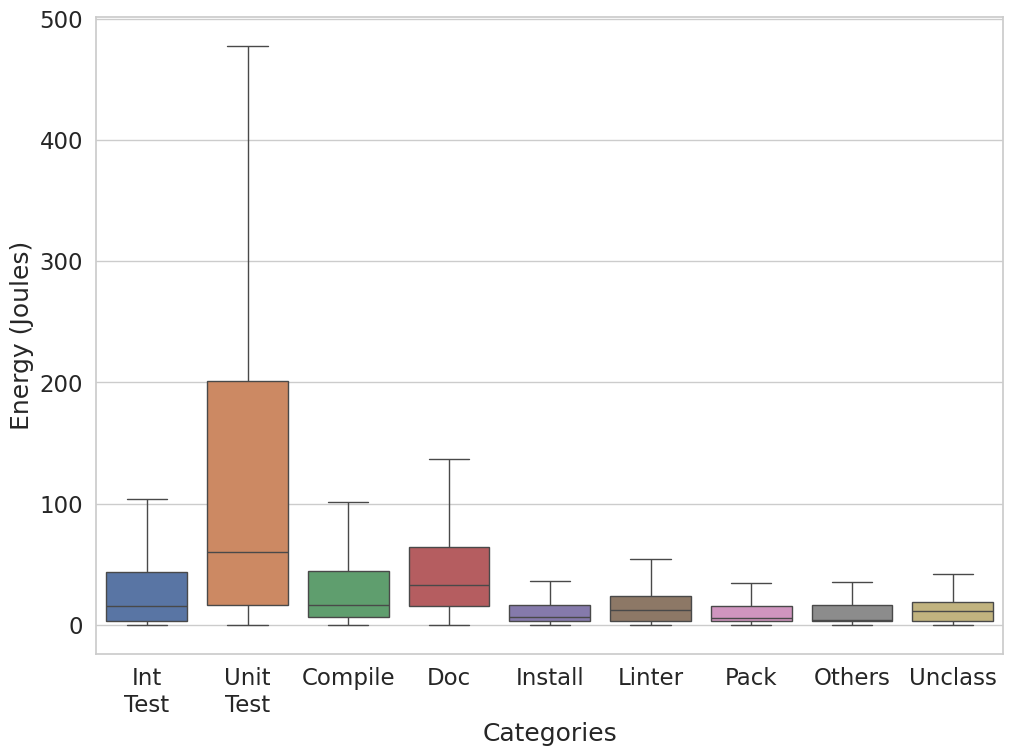

In [20]:
import seaborn as sns

energy_plot = {}
for key, value in tasks_energy_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    energy_plot[new_key] = value

sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = energy_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Energy (Joules)')

#g.set_yscale("log")

Text(0, 0.5, 'Power (Watts)')

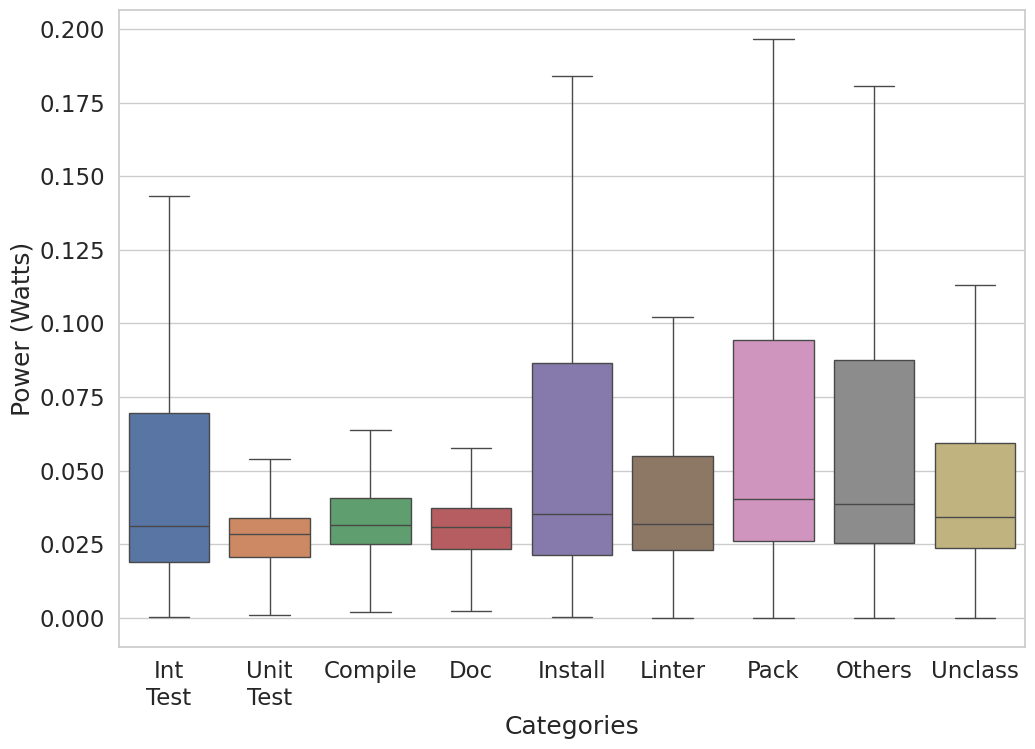

In [21]:
power_plot = {}
for key, value in tasks_power_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    power_plot[new_key] = value

sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = power_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Power (Watts)')

